# Visualize CSTR model

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import matplotlib as mpl

The code visulaize the graph which represents the Execution time to solve vs. NT series of CSTRs superstructure problem considering only cases within 1% of global minimum solved using different methods. The code imports the data from the file "cstr_data.csv" and plots the graph using matplotlib.

In [23]:
df = pd.read_csv('cstr_results_new.csv')
df

,Method,Approach,Solver,Objective,Time,Status,User_time,NT
0,MINLP,bigm,antigone,9.894737,0.138,infeasible,NaN,5
1,MINLP,bigm,baron,3.061848,263.565,optimal,NaN,5
2,MINLP,bigm,scip,3.061996,197.432,optimal,NaN,5
3,MINLP,bigm,dicopt,3.062015,0.753,optimal,NaN,5
4,MINLP,bigm,sbb,3.062015,2.715,optimal,NaN,5
...,...,...,...,...,...,...,...,...
244,LDSDA,k=2,baron,3.130198,17.310,optimal,12.959000,20
245,LDSDA,k=Infinity,knitro,2.781483,20.490,optimal,0.792000,25
246,LDSDA,k=2,knitro,3.130198,4.910,optimal,0.195999,25
247,LDSDA,k=Infinity,baron,2.787705,901.370,maxTimeLimit,884.613001,25


The below Python code read the data from the file "cstr_data.csv" and plot the graph using matplotlib. 
The data file contains the data of the Execution time to solve vs. NT series of CSTRs superstructure problem considering only cases within 1% of global minimum solved using different methods. 
The first code did not filter ott the data and the second code filters the data which have more than 1% of gap between the global minimum.
The third code filters out MIP methods. The fourth code filters out the GLOA.

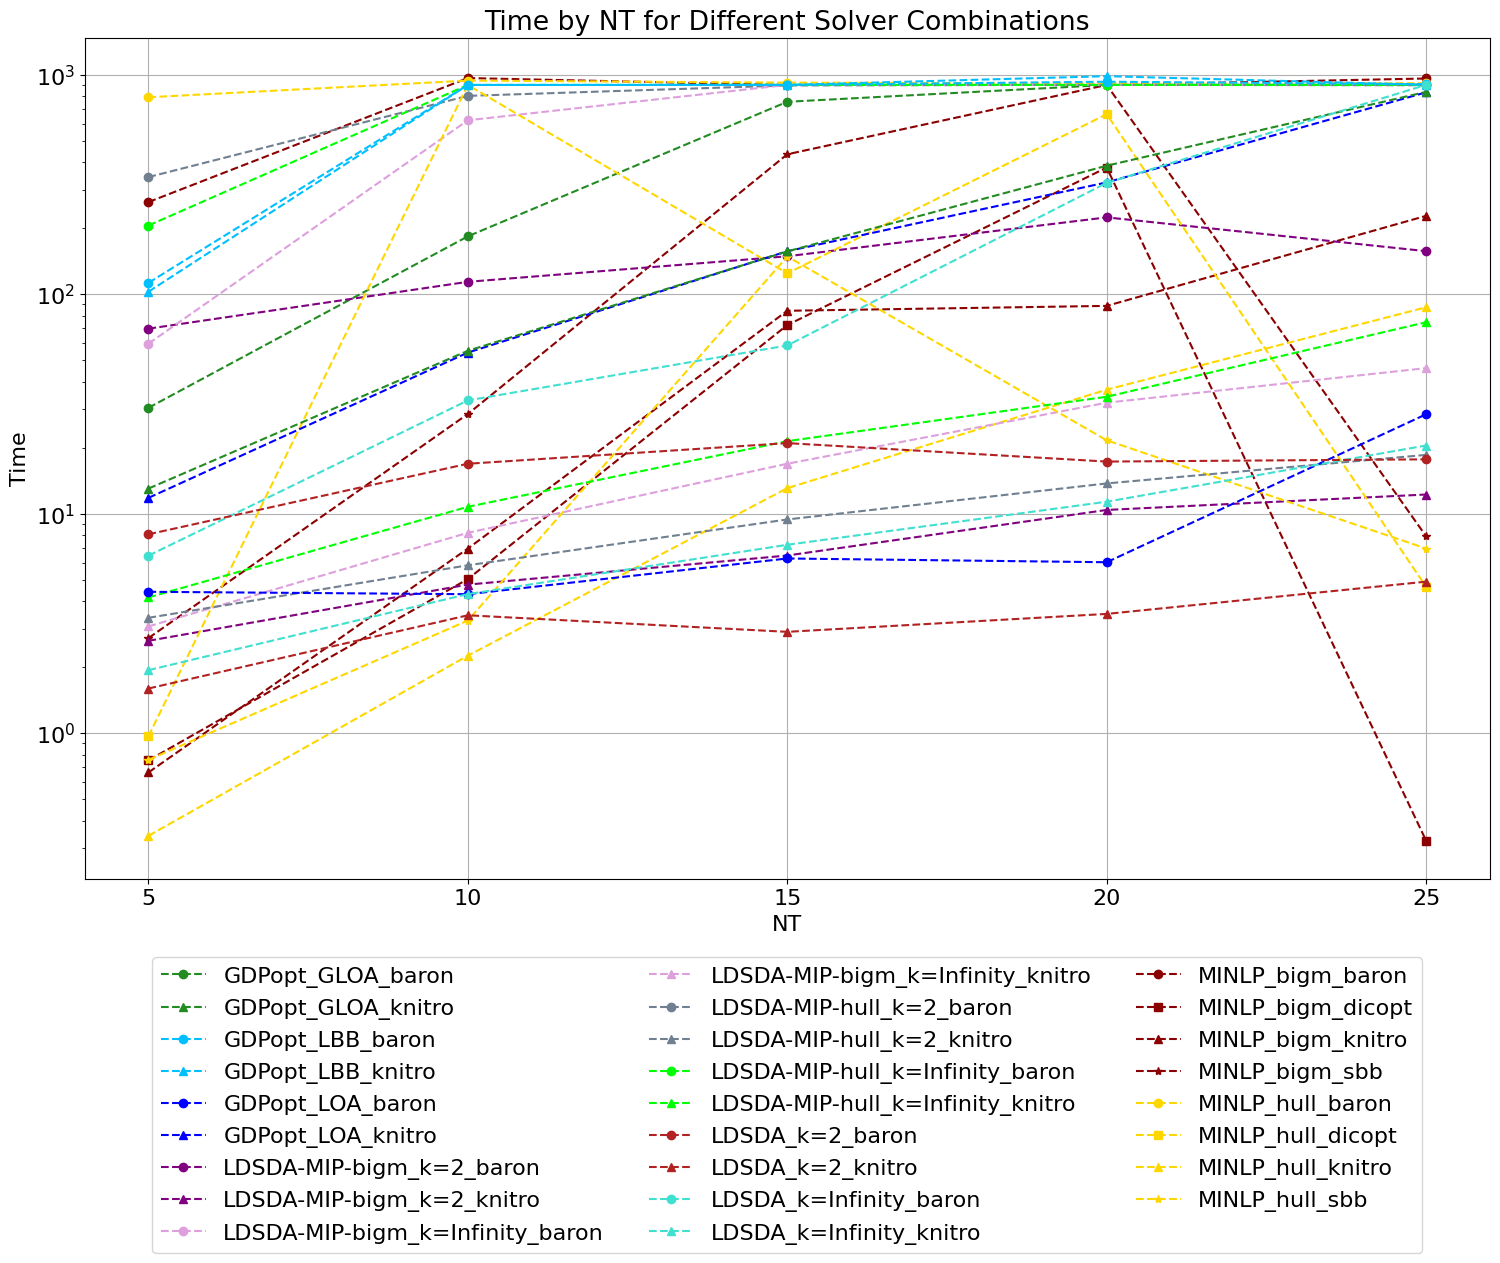

In [32]:
df = pd.read_csv('cstr_results_new.csv')

# Drop all the results with solver 'antigone' and 'scip'
df = df[df['Solver'] != 'antigone']
df = df[df['Solver'] != 'scip']

# Drop all the results with number of reactors not in the list selected_NT
selected_NT = [5, 10, 15, 20, 25]
df = df[df['NT'].isin(selected_NT)]

# Concatenate Method, Approach, and Solver columns
df['Method_Approach_Solver'] = df['Method'] + '_' + df['Approach'] + '_' + df['Solver']

# Plotting setup
fig, ax = plt.subplots(figsize=(20, 10))
all_combinations = pd.Series(df['Method_Approach_Solver'].unique())

# Use all combinations
combinations = all_combinations

# Create a dictionary with solvers and their respective markers
solver_markers = {
    'baron': 'o',
    'knitro': '^',
    'sbb': '*',
    'dicopt': 's'
}

# Create a dictionary for method_approach and their respective colors
method_approach_colors = {
    'MINLP_hull': 'gold',                 
    'MINLP_bigm': 'darkred',              
    'GDPopt_LOA': 'blue',                 
    'GDPopt_GLOA': 'forestgreen',         
    'GDPopt_LBB': 'deepskyblue',          
    'LDSDA-MIP-hull_k=2': 'slategray',    
    'LDSDA-MIP-hull_k=Infinity': 'lime',  
    'LDSDA-MIP-bigm_k=2': 'purple',       
    'LDSDA-MIP-bigm_k=Infinity': 'plum',  
    'LDSDA_k=2': 'firebrick',             
    'LDSDA_k=Infinity': 'turquoise'       
}


# If two rows with same 'Method_Approach_Solver' and 'NT' value, keep the one with the lowest 'Time' value
df = df.sort_values('Time').drop_duplicates(['Method_Approach_Solver', 'NT'])
df = df.sort_values(['Method_Approach_Solver', 'NT'])

for combination in combinations:
    subset = df[(df['Method_Approach_Solver'] == combination) & (df['Status'] != 'infeasible')]
    subset = subset[subset['Objective'] <= subset.groupby('NT')['Objective'].transform('min')*(1 + 1e-3)]
    
    # Extract the method, approach, and solver from the combination
    components = combination.split('_')
    solver = components[-1]
    if components[0] == "D-SDA":
        method_approach = components[0] + "_" + components[1] + "_" + components[2]
    else:
        method_approach = '_'.join(components[:2])
    
    marker = solver_markers.get(solver, 'o')  # Use 'o' as default if solver not found in dictionary
    color = method_approach_colors.get(method_approach, 'green')  # Use 'green' as default if method-approach not found

    plt.plot(subset['NT'], subset['Time'], label=combination, marker=marker, linestyle='--', color=color)

plt.xlabel('NT')
plt.yscale('log')
plt.ylabel('Time')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Time by NT for Different Solver Combinations')
plt.grid(True)
plt.tight_layout()

# Set x-ticks to only show the selected_NT values
ax.set_xticks(selected_NT)

# Sort the legend labels and handles
handles, labels = ax.get_legend_handles_labels()
sorted_indices = np.argsort(labels)
sorted_handles = [handles[idx] for idx in sorted_indices]
sorted_labels = [labels[idx] for idx in sorted_indices]
ax.legend(sorted_handles, sorted_labels, loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3)

plt.show()

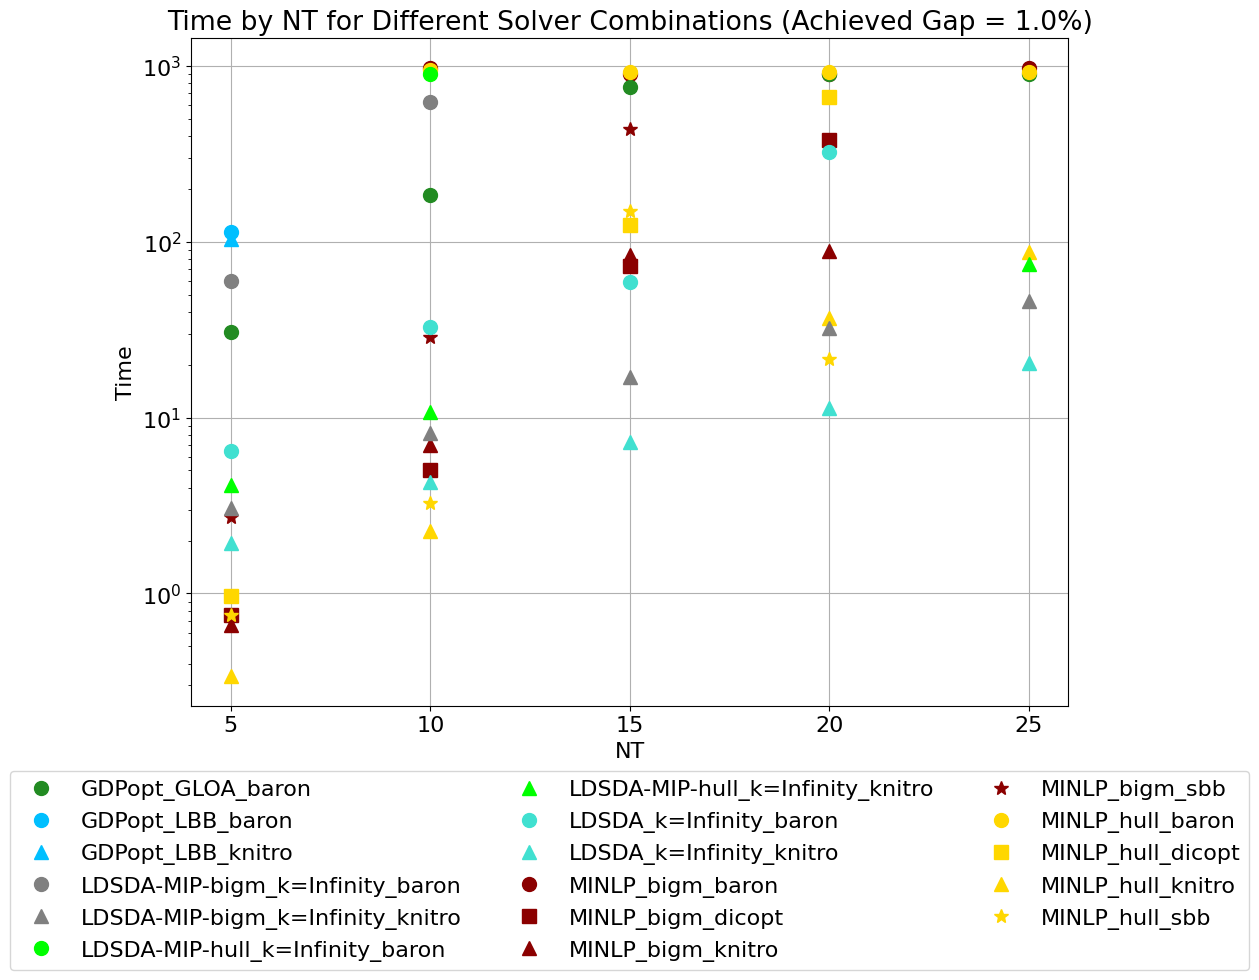

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from CSV
df = pd.read_csv('cstr_results_new.csv')

# Drop results with solver 'antigone' and 'scip'
df = df[df['Solver'] != 'antigone']
df = df[df['Solver'] != 'scip']

# Filter based on the number of reactors
selected_NT = [5, 10, 15, 20, 25]
df = df[df['NT'].isin(selected_NT)]

# Concatenate Method, Approach, and Solver columns
df['Method_Approach_Solver'] = df['Method'] + '_' + df['Approach'] + '_' + df['Solver']

# Filter dataframe based on the provided objective values for each NT
objective_values = {
    5: 3.06201,
    10: 2.88954,
    15: 2.82939,
    20: 2.79941,
    25: 2.78148
}

df = df[df.apply(lambda row: np.isclose(row['Objective'], objective_values[row['NT']], rtol=1e-5), axis=1)]

# Plotting setup
fig, ax = plt.subplots(figsize=(10, 8))
unique_combinations = pd.Series(df['Method_Approach_Solver'].unique())

# Create dictionaries for markers and colors
solver_markers = {
    'baron': 'o',
    'knitro': '^',
    'sbb': '*',
    'dicopt': 's'
}

# Create a dictionary for method_approach and their respective colors
method_approach_colors = {
    'MINLP_hull': 'gold',                 
    'MINLP_bigm': 'darkred',              
    'GDPopt_LOA': 'blue',                 
    'GDPopt_GLOA': 'forestgreen',         
    'GDPopt_LBB': 'deepskyblue',          
    'LDSDA-MIP-hull_k=2': 'slategray',    
    'LDSDA-MIP-hull_k=Infinity': 'lime',  
    'LDSDA-MIP-bigm_k=2': 'purple',       
    'LDSDA-MIP-bigm_k=Infinity': 'gray',  
    'LDSDA_k=2': 'firebrick',             
    'LDSDA_k=Infinity': 'turquoise'       
}

# Filter duplicates based on 'Time'
df = df.sort_values('Time')
df = df.drop_duplicates(['Method_Approach_Solver', 'NT'])
df = df.sort_values(['Method_Approach_Solver', 'NT'])

# Plotting
for combination in unique_combinations:
    subset = df[(df['Method_Approach_Solver'] == combination) & (df['Status'] != 'infeasible')]
    subset = subset[subset['Objective'] <= subset.groupby('NT')['Objective'].transform('min')*(1 + 1e-3)]

    components = combination.split('_')
    solver = components[-1]
    if components[0] == "D-SDA":
        method_approach = components[0] + "_" + components[1] + "_" + components[2]
    else:
        method_approach = '_'.join(components[:2])

    marker = solver_markers.get(solver, 'o')
    color = method_approach_colors.get(method_approach, 'green')

    plt.plot(subset['NT'], subset['Time'], label=combination, marker=marker, linestyle='', color=color, markersize=10)

plt.xlabel('NT')
plt.yscale('log')
plt.ylabel('Time')
plt.title('Time by NT for Different Solver Combinations (Achieved Gap = 1.0%)')
plt.grid(True)
plt.tight_layout()
ax.set_xticks(selected_NT)

# Sort and show the legend
handles, labels = ax.get_legend_handles_labels()
sorted_indices = np.argsort(labels)
sorted_handles = [handles[idx] for idx in sorted_indices]
sorted_labels = [labels[idx] for idx in sorted_indices]
ax.legend(sorted_handles, sorted_labels, loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3)

plt.show()


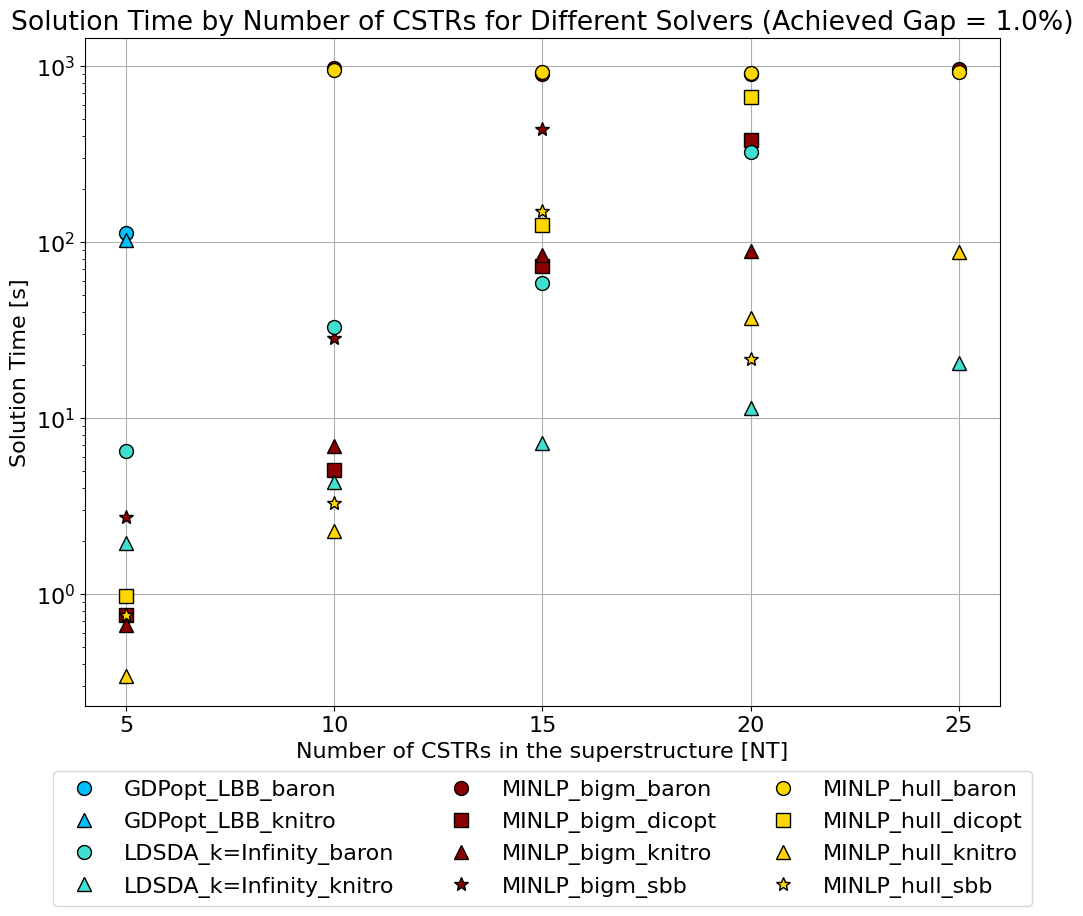

In [34]:
df = pd.read_csv('cstr_results_new.csv')

# Drop all the results with solver 'antigone' and 'scip'
df = df[df['Solver'] != 'antigone']
df = df[df['Solver'] != 'scip']

# Drop all the results with number of reactors not in the list selected_NT
selected_NT = [5, 10, 15, 20, 25]
df = df[df['NT'].isin(selected_NT)]

# Concatenate Method, Approach, and Solver columns
df['Method_Approach_Solver'] = df['Method'] + '_' + df['Approach'] + '_' + df['Solver']

# Given Objective values for each NT
objective_values = {
    5: 3.06201,
    10: 2.88954,
    15: 2.82939,
    20: 2.79941,
    25: 2.78148
}

# Filter dataframe based on the provided objective values for each NT
df = df[df.apply(lambda row: np.isclose(row['Objective'], objective_values[row['NT']], rtol=1e-5), axis=1)]

# Filter dataframe to remove GDPopt_GLOA from the methods
df = df[~df['Method_Approach_Solver'].str.contains('GDPopt_GLOA')] 
# Filter to remove any method with LDSDA-MIP
df = df[~df['Method_Approach_Solver'].str.contains('LDSDA-MIP')]

# Plotting setup
fig, ax = plt.subplots(figsize=(14, 8))

# Increase font size
plt.rcParams.update({'font.size': 16})

all_combinations = pd.Series(df['Method_Approach_Solver'].unique())

# Use all combinations
combinations = all_combinations

# Create a dictionary with solvers and their respective markers
solver_markers = {
    'baron': 'o',
    'knitro': '^',
    'sbb': '*',
    'dicopt': 's'
}

# Create a dictionary for method_approach and their respective colors
method_approach_colors = {
    'MINLP_hull': 'gold',                 
    'MINLP_bigm': 'darkred',              
    'GDPopt_LOA': 'blue',                 
    'GDPopt_GLOA': 'forestgreen',         
    'GDPopt_LBB': 'deepskyblue',          
    'LDSDA-MIP-hull_k=2': 'slategray',    
    'LDSDA-MIP-hull_k=Infinity': 'lime',  
    'LDSDA-MIP-bigm_k=2': 'purple',       
    'LDSDA-MIP-bigm_k=Infinity': 'salmon',  
    'LDSDA_k=2': 'firebrick',             
    'LDSDA_k=Infinity': 'turquoise'       
}


# If two rows with same 'Method_Approach_Solver' and 'NT' value, keep the one with the lowest 'Time' value
df = df.sort_values('Time').drop_duplicates(['Method_Approach_Solver', 'NT'])
df = df.sort_values(['Method_Approach_Solver', 'NT'])

for combination in combinations:
    subset = df[(df['Method_Approach_Solver'] == combination) & (df['Status'] != 'infeasible')]
    subset = subset[subset['Objective'] <= subset.groupby('NT')['Objective'].transform('min')*(1 + 1e-3)]
    
    # Extract the method, approach, and solver from the combination
    components = combination.split('_')
    solver = components[-1]
    if components[0] == "D-SDA":
        method_approach = components[0] + "_" + components[1] + "_" + components[2]
    else:
        method_approach = '_'.join(components[:2])
    
    marker = solver_markers.get(solver, 'o')  # Use 'o' as default if solver not found in dictionary
    color = method_approach_colors.get(method_approach, 'green')  # Use 'green' as default if method-approach not found

    plt.plot(subset['NT'], subset['Time'], label=combination, mec='black', marker=marker, linestyle='', color=color, markersize=10)

plt.xlabel('Number of CSTRs in the superstructure [NT]')
plt.yscale('log')
plt.ylabel('Solution Time [s]')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Solution Time by Number of CSTRs for Different Solvers (Achieved Gap = 1.0%)')
plt.grid(True)
plt.tight_layout()

# Set x-ticks to only show the selected_NT values
ax.set_xticks(selected_NT)

# Sort the legend labels and handles
handles, labels = ax.get_legend_handles_labels()
sorted_indices = np.argsort(labels)
sorted_handles = [handles[idx] for idx in sorted_indices]
sorted_labels = [labels[idx] for idx in sorted_indices]
ax.legend(sorted_handles, sorted_labels, loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3)

plt.show()